In [1]:
'''
attribute documentation: 
3 age: age in years 
4 sex: sex (1 = male; 0 = female) 
9 cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 
10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
12 chol: serum cholestoral in mg/dl 
16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
19 restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
32 thalach: maximum heart rate achieved 
38 exang: exercise induced angina (1 = yes; 0 = no) 
40 oldpeak = ST depression induced by exercise relative to rest 
41 slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
44 ca: number of major vessels (0-3) colored by flourosopy 
51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
58 num: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels) 
'''

"\nattribute documentation: \n3 age: age in years \n4 sex: sex (1 = male; 0 = female) \n9 cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic \n10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) \n12 chol: serum cholestoral in mg/dl \n16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) \n19 restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria \n32 thalach: maximum heart rate achieved \n38 exang: exercise induced angina (1 = yes; 0 = no) \n40 oldpeak = ST depression induced by exercise relative to rest \n41 slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping \n44 ca: number of major vessels (0-3) colored by flo

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load data
heart_data_raw = pd.read_excel("heart.xlsx")
heart_data_raw.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Validate missing values 
#There are no missing values for any of the columns
print('Check for NaNs')
print(heart_data_raw.isnull().any())

#Assessing the Skewness of data 
#All values between +- 2 which is considered acceptable
print('\n Check Skew')
print(heart_data_raw.skew())

#Statistics of original data
#303 observations for each variable (validates that there are no NaNs)
print('\n Summary Statistics')
heart_data_raw.describe()

Check for NaNs
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

 Check Skew
age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

 Summary Statistics


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Check for outliers on continuous variables
#Outlier was defined as value exceeding 3 std (z score greater than 3) from the mean
#If an outlier was detected it was relaced with NaN and the observation was subsequently eliminated
def detect_outlier(data):
    outliers = []
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for x in range(0, len(data)):
        z_score= (data[x] - mean)/std
        if np.abs(z_score) > threshold:
            data[x] = np.nan
            
    return data

heart_data_no_outliers = heart_data_raw.copy()

heart_data_no_outliers['age'] = detect_outlier(heart_data_no_outliers['age'])
heart_data_no_outliers['trestbps'] = detect_outlier(heart_data_no_outliers['trestbps'])
heart_data_no_outliers['chol'] = detect_outlier(heart_data_no_outliers['chol'])
heart_data_no_outliers['thalach'] = detect_outlier(heart_data_no_outliers['thalach'])
heart_data_no_outliers['oldpeak'] = detect_outlier(heart_data_no_outliers['oldpeak'])

heart_data_no_outliers = heart_data_no_outliers.dropna()

#Rerun summary statistics with outliers removed
#Validate missing values 
#There are no missing values for any of the columns
print('Check for NaNs')
print(heart_data_no_outliers.isnull().any())

#Assessing the Skewness of data 
#All values between +- 2 which is considered acceptable
print('\n Check Skew')
print(heart_data_no_outliers.skew())

#Statistics with outliers removed
print('Summary Statistics')
heart_data_no_outliers.describe()

C:\Users\heli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\heli\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Check for NaNs
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

 Check Skew
age        -0.172606
sex        -0.845655
cp          0.468668
trestbps    0.529652
chol        0.269087
fbs         2.012412
restecg     0.132950
thalach    -0.480430
exang       0.743629
oldpeak     1.012591
slope      -0.506177
ca          1.359237
thal       -0.455560
target     -0.220113
dtype: float64
Summary Statistics


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,54.176871,0.693878,0.979592,131.057823,243.646259,0.146259,0.537415,149.887755,0.326531,0.986054,1.414966,0.710884,2.299320,0.554422
std,9.112270,0.461667,1.035014,16.808093,45.854020,0.353968,0.526073,22.490900,0.469743,1.075848,0.605363,1.012592,0.611773,0.497877
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.750000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Summary Statistics grouped by presence of heart disease 
#1 indicates heart disease 0 indicates no hear disease
heart_data_grouped = heart_data_no_outliers.groupby('target')
heart_data_grouped.aggregate([np.mean, np.std])

age                 sex                  cp            \
             mean       std      mean       std      mean       std   
target                                                                
0       56.473282  8.083533  0.847328  0.361052  0.496183  0.922989   
1       52.331288  9.489471  0.570552  0.496523  1.368098  0.955537   

          trestbps                   chol             ...     exang            \
              mean        std        mean        std  ...      mean       std   
target                                                ...                       
0       133.213740  17.346694  249.198473  45.912194  ...  0.557252  0.498618   
1       129.325153  16.208473  239.184049  45.456836  ...  0.141104  0.349202   

         oldpeak               slope                  ca                thal  \
            mean       std      mean       std      mean       std      mean   
target                                                                         
0       1.496947  1.172108  1.190840  0.542282  1.145038  1.031221  2.526718   
1       0.575460  0.781190  1.595092  0.594606  0.361963  0.852173  2.116564   

                  
             std  
target            
0       0.694243  
1       0.463383  

[2 rows x 26 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000027E54E1F60>,
      dtype=object)

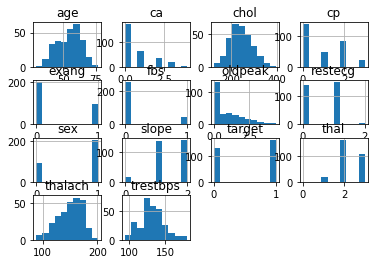

In [7]:
#Histogram for spread of data
heart_data_no_outliers.hist()

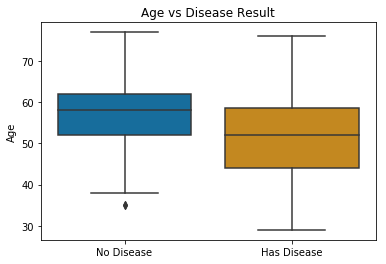

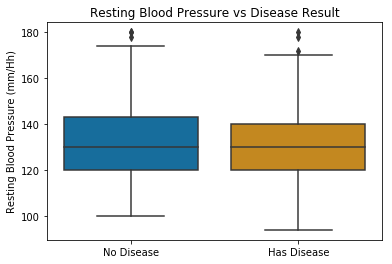

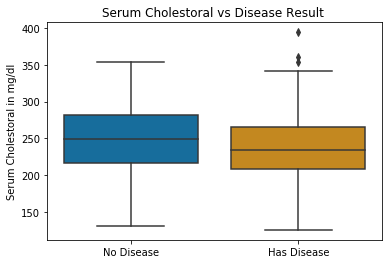

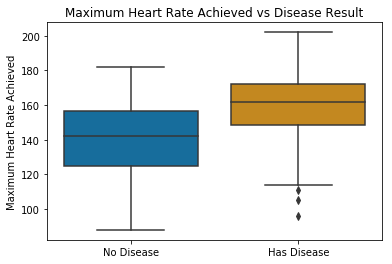

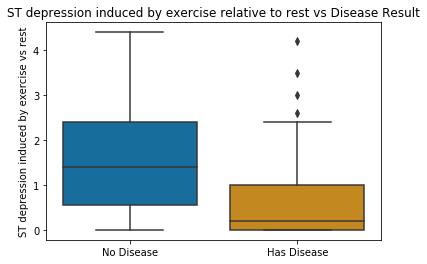

In [8]:
#created boxplots for continuous variables
graph = sns.boxplot(y='age', x='target', data=heart_data_no_outliers,palette="colorblind")
graph.set_title ('Age vs Disease Result')
graph.set_ylabel('Age')
graph.set_xlabel('')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

graph = sns.boxplot(y='trestbps', x='target', data=heart_data_no_outliers,palette="colorblind")
graph.set_title ('Resting Blood Pressure vs Disease Result')
graph.set_ylabel('Resting Blood Pressure (mm/Hh)')
graph.set_xlabel('')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

graph = sns.boxplot(y='chol', x='target', data=heart_data_no_outliers,palette="colorblind")
graph.set_title ('Serum Cholestoral vs Disease Result ')
graph.set_ylabel('Serum Cholestoral in mg/dl')
graph.set_xlabel('')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

graph = sns.boxplot(y='thalach', x='target', data=heart_data_no_outliers,palette="colorblind")
graph.set_title ('Maximum Heart Rate Achieved vs Disease Result')
graph.set_ylabel('Maximum Heart Rate Achieved')
graph.set_xlabel('')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

graph = sns.boxplot(y='oldpeak', x='target', data=heart_data_no_outliers,palette="colorblind")
graph.set_title ('ST depression induced by exercise relative to rest vs Disease Result')
graph.set_ylabel('ST depression induced by exercise vs rest')
graph.set_xlabel('')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

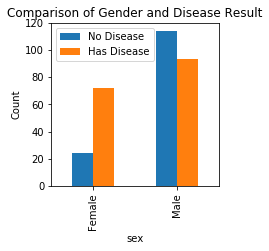

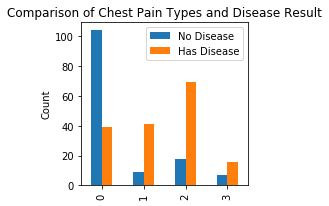

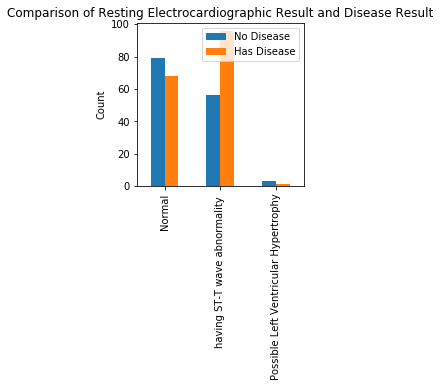

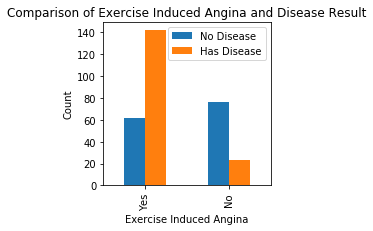

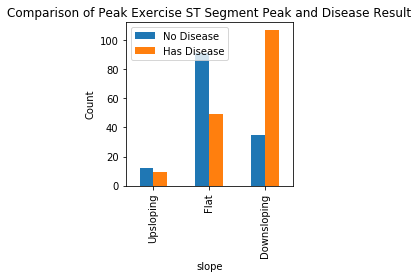

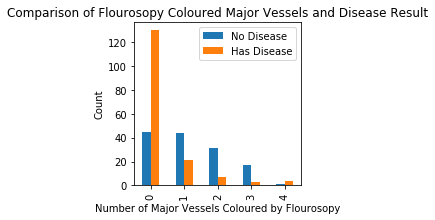

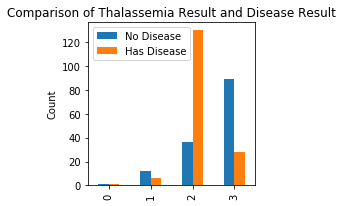

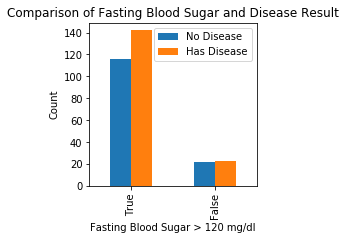

In [10]:
#Bar graphs for categorical variables
heart_data = heart_data_raw.copy()
heart_data['UID'] =  range(1, len(heart_data) + 1)
heart_data.set_index('UID')
targetData=['No Disease', 'Has Disease']

heart_data_subset = heart_data[['target','sex', 'UID']].groupby(['target', 'sex'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Gender and Disease Result')
graph.set_ylabel('Count')
plt.xticks([0, 1], [ 'Female', 'Male'])
plt.legend(targetData,loc=2)
plt.show();


heart_data_subset = heart_data[['target','cp', 'UID']].groupby(['target', 'cp'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Chest Pain Types and Disease Result')
graph.set_ylabel('Count')
graph.set_xlabel('')
plt.legend(targetData,loc=1)
plt.show();

heart_data_subset = heart_data[['target','restecg', 'UID']].groupby(['target', 'restecg'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Resting Electrocardiographic Result and Disease Result')
graph.set_ylabel('Count')
graph.set_xlabel('')
plt.xticks([0, 1,2], [ 'Normal', 'having ST-T wave abnormality ', 'Possible Left Ventricular Hypertrophy'])
plt.legend(targetData,loc=1)
plt.show();


heart_data_subset = heart_data[['target','exang', 'UID']].groupby(['target', 'exang'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Exercise Induced Angina and Disease Result')
graph.set_ylabel('Count')
graph.set_xlabel('Exercise Induced Angina')
plt.xticks([0, 1], [ 'Yes', 'No'])
plt.legend(targetData,loc=1)
plt.show();

heart_data_subset = heart_data[['target','slope', 'UID']].groupby(['target', 'slope'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Peak Exercise ST Segment Peak and Disease Result')
graph.set_ylabel('Count')
plt.xticks([0,1,2],['Upsloping', 'Flat', 'Downsloping'])
plt.legend(targetData,loc=2)
plt.show();

heart_data_subset = heart_data[['target','ca', 'UID']].groupby(['target', 'ca'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Flourosopy Coloured Major Vessels and Disease Result')
graph.set_ylabel('Count')
graph.set_xlabel('Number of Major Vessels Coloured by Flourosopy')
plt.legend(targetData,loc=1)
plt.show();

heart_data_subset = heart_data[['target','thal', 'UID']].groupby(['target', 'thal'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Thalassemia Result and Disease Result')
graph.set_ylabel('Count')
graph.set_xlabel('')
plt.legend(targetData,loc=2)
plt.show();

heart_data_subset = heart_data[['target','fbs', 'UID']].groupby(['target', 'fbs'])['UID'].count().unstack('target')
graph = heart_data_subset.plot(kind='bar', legend = True,  figsize=(3,3))
graph.set_title ('Comparison of Fasting Blood Sugar and Disease Result')
graph.set_ylabel('Count')
graph.set_xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.legend(targetData,loc=1)
plt.xticks([0,1],['True', 'False'])
plt.show();
